In [202]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
data_path = "test_data_set.csv"

In [204]:
data_raw = pd.read_csv(data_path)

In [205]:
data_raw.shape

(949, 3)

In [206]:
df = data_raw[data_raw['Tags'].notnull()]

In [207]:
df.columns = ['title', 'tags', 'content']

In [208]:
df = df.drop(["title"], axis = 1)

In [209]:
def clean_tag(tag):
    tag = tag.lower().replace(" ", "")
    return tag
tags = []
contents = []
for _, row in df.iterrows():
    content = row.content
    for tag in row.tags.split(','):
        contents.append(content)
        tags.append(clean_tag(tag))
tag_to_content = pd.DataFrame({
    "tag": tags,
    "content": contents
})

In [210]:
tag_to_content

,tag,content
0,array,"Given an array of integers, return indices of ..."
1,hashtable,"Given an array of integers, return indices of ..."
2,linkedlist,You are given two non-empty linked lists repre...
3,math,You are given two non-empty linked lists repre...
4,hashtable,"Given a string, find the length of the longest..."
5,twopointers,"Given a string, find the length of the longest..."
6,string,"Given a string, find the length of the longest..."
7,array,There are two sorted arrays nums1 and nums2 of...
8,binarysearch,There are two sorted arrays nums1 and nums2 of...
9,divideandconquer,There are two sorted arrays nums1 and nums2 of...


In [211]:
tags = tag_to_content.tag.unique().tolist()

In [212]:
tags

['array',
 'hashtable',
 'linkedlist',
 'math',
 'twopointers',
 'string',
 'binarysearch',
 'divideandconquer',
 'dynamicprogramming',
 'backtracking',
 'stack',
 'heap',
 'greedy',
 'sort',
 'bitmanipulation',
 'stringdynamic',
 'programming',
 'tree',
 'depth-firstsearch',
 'breadth-firstsearch',
 'unionfind',
 'graph',
 'design',
 'sql',
 'bash',
 'topologicalsort',
 'trie',
 'binaryindexedtree',
 'segmenttree',
 'binarysearchtree',
 'hasttable',
 'recursion',
 'stacktree',
 'map',
 'breadthfirst-search',
 'brainteaser',
 'bread-firstsearch',
 'memoization',
 'depth-firstgraph',
 'queue',
 'minimax',
 'reservoirsampling',
 'dynamicprgramming',
 'random',
 'rejectionsampling',
 'geometry',
 'desgin',
 'recurrsion']

In [213]:
print(len(tags))

48


In [214]:
for tag in tags:
    tag_to_content[tag] = tag_to_content.tag.apply(lambda x: 1 if x == tag else 0)

In [215]:
tag_to_content

,tag,content,array,hashtable,linkedlist,math,twopointers,string,binarysearch,divideandconquer,...,depth-firstgraph,queue,minimax,reservoirsampling,dynamicprgramming,random,rejectionsampling,geometry,desgin,recurrsion
0,array,"Given an array of integers, return indices of ...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hashtable,"Given an array of integers, return indices of ...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,linkedlist,You are given two non-empty linked lists repre...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,math,You are given two non-empty linked lists repre...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,hashtable,"Given a string, find the length of the longest...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,twopointers,"Given a string, find the length of the longest...",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,string,"Given a string, find the length of the longest...",0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,array,There are two sorted arrays nums1 and nums2 of...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,binarysearch,There are two sorted arrays nums1 and nums2 of...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,divideandconquer,There are two sorted arrays nums1 and nums2 of...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


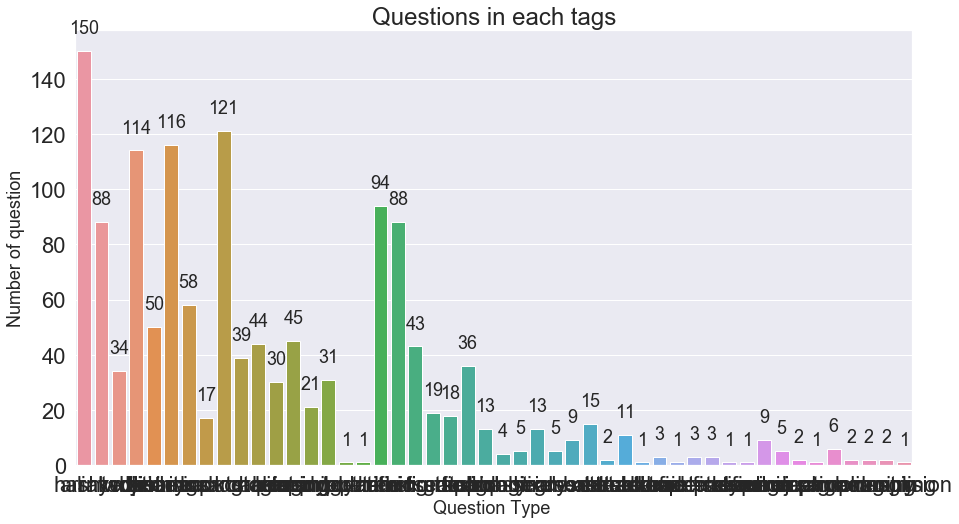

In [216]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(tags, tag_to_content.iloc[:,2:].sum().values)

plt.title("Questions in each tags", fontsize=24)
plt.ylabel('Number of question', fontsize=18)
plt.xlabel('Question Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = tag_to_content.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

In [218]:
#***No of questions with mulitple tags**

In [225]:
rowSums = tag_to_content.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

rowSums



0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1348    1
1349    1
1350    1
1351    1
1352    1
1353    1
1354    1
1355    1
1356    1
1357    1
1358    1
1359    1
1360    1
1361    1
1362    1
1363    1
1364    1
1365    1
1366    1
1367    1
1368    1
1369    1
1370    1
1371    1
1372    1
1373    1
1374    1
1375    1
1376    1
1377    1
Length: 1378, dtype: int64

In [191]:
df_plot = pd.DataFrame(y_enc) 
df_plot["content"] = tag_to_content.content
df_plot

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,content
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,"Given an array of integers, return indices of ..."
1,0,1,1,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,"Given an array of integers, return indices of ..."
2,0,0,0,0,1,1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,You are given two non-empty linked lists repre...
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,You are given two non-empty linked lists repre...
4,0,0,0,0,0,1,0,0,0,1,...,1,1,1,0,0,1,0,0,0,"Given a string, find the length of the longest..."
5,0,0,0,0,0,0,0,1,0,1,...,1,1,1,0,0,0,0,0,0,"Given a string, find the length of the longest..."
6,0,1,1,1,0,1,0,0,1,1,...,1,1,0,0,0,0,0,1,0,"Given a string, find the length of the longest..."
7,0,1,0,1,1,1,0,0,0,1,...,1,0,0,1,1,0,0,0,0,There are two sorted arrays nums1 and nums2 of...
8,0,1,0,1,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,There are two sorted arrays nums1 and nums2 of...
9,0,1,1,1,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,There are two sorted arrays nums1 and nums2 of...


In [196]:
tag_to_content

,tag,content
0,array,"Given an array of integers, return indices of ..."
1,hashtable,"Given an array of integers, return indices of ..."
2,linkedlist,You are given two non-empty linked lists repre...
3,math,You are given two non-empty linked lists repre...
4,hashtable,"Given a string, find the length of the longest..."
5,twopointers,"Given a string, find the length of the longest..."
6,string,"Given a string, find the length of the longest..."
7,array,There are two sorted arrays nums1 and nums2 of...
8,binarysearch,There are two sorted arrays nums1 and nums2 of...
9,divideandconquer,There are two sorted arrays nums1 and nums2 of...


In [194]:
counts = []
for i,tag in enumerate(tags):
    counts.append((tag, tag_to_content[i].sum()))
df_stats = pd.DataFrame(counts, columns=['tags', 'number of questions'])
df_stats

KeyError: 0

In [116]:
df['tags'].apply(lambda x: x.split())

0                                     [Array,Hashtable]
1                                 [Linked, list, ,Math]
2                    [Hash, Table,Two, pointers,String]
3       [Array,, Binary, Search,, Divide, and, Conquer]
4                       [String,, Dynamic, Programming]
5                                              [String]
6                                                [Math]
7                                       [Math,, String]
8                                                [Math]
9      [String,, Dynamic, Programming,, Back, Tracking]
10                              [Array,, Two, Pointers]
11                                      [Math,, String]
12                                      [Math,, String]
13                                             [String]
14                              [Array,, Two, Pointers]
15                              [Array,, Two, Pointers]
16                            [String,, Back, Tracking]
17                [Array,, Hash, Table,, Two, Po

In [118]:
df['tags']

0                                 Array,Hashtable
1                               Linked list ,Math
2                  Hash Table,Two pointers,String
3        Array, Binary Search, Divide and Conquer
4                     String, Dynamic Programming
5                                          String
6                                            Math
7                                    Math, String
8                                            Math
9      String, Dynamic Programming, Back Tracking
10                            Array, Two Pointers
11                                   Math, String
12                                   Math, String
13                                         String
14                            Array, Two Pointers
15                            Array, Two Pointers
16                          String, Back Tracking
17                Array, Hash Table, Two Pointers
18                     Linked list , Two Pointers
19                                  String ,Stack


In [38]:
tags = tags.dropna()

In [39]:
plt.figure(figsize=(40,25))

<Figure size 2880x1800 with 0 Axes>

<Figure size 2880x1800 with 0 Axes>

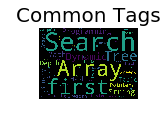

In [45]:
text = tags
tags_cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Common Tags",fontsize=20)
plt.imshow(tags_cloud)

In [55]:
##Stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
data = data_raw.Content.dropna()
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data = data.apply(stemming)
data.head()
data

0      given an array of integers, return indic of th...
1      you are given two non-empti link list repres t...
2      given a string, find the length of the longest...
3      there are two sort array nums1 and nums2 of si...
4      given a string s, find the longest palindrom s...
5      the string "paypalishiring" is written in a zi...
6      given a 32-bit sign integer, revers digit of a...
7      implement atoi which convert a string to an in...
8      determin whether an integ is a palindrome. an ...
9      given an input string (s) and a pattern (p), i...
10     given n non-neg integ a1, a2, ..., an , where ...
11     roman numer are repres by seven differ symbols...
12     roman numer are repres by seven differ symbols...
13     write a function to find the longest common pr...
14     given an array num of n integers, are there el...
15     given an array num of n integ and an integ tar...
16     given a string contain digit from 2-9 inclusiv...
17     given an array num of n 

In [57]:
#Train-Test Split
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)
print(train.shape)
print(test.shape)


(660,)
(283,)


In [60]:
train_text = train
test_text = test

In [61]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [64]:
#Multi-Label Classification
#One Vs Rest
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier